In [2]:
import os
import cv2
import math
import random
import pydot
import graphviz
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.saving import load_model

In [3]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [4]:
def frames_extraction(video_path,image_height,image_width):
    # Empty List declared to store video frames
    frames_list = []
     
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)
 
    # Iterating through Video Frames
    while True:
 
        # Reading a frame from the video file 
        success, frame = video_reader.read() 
 
        # If Video frame was not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
         
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
     
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # returning the frames list 
    return frames_list

In [5]:
def create_dataset(image_height, image_width, max_images_per_class,classes_list,dataset_directory):
 
    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
     
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
         
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))
 
        # Iterating through all the files present in the files list
        for file_name in files_list:
 
            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)
 
            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path,image_height,image_width)
 
            # Appending the frames to a temporary list.
            temp_features.extend(frames)
         
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))
 
        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
         
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()
 
    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
 
    return features, labels

In [6]:
'''
# Let's create a function that will construct our model
def create_model(image_height,image_width,model_output_size):
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Defining The Model Architecture 2-layer cnn
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(model_output_size, activation = 'softmax'))
 
    # Printing the models summary
    model.summary()
 
    return model
'''

"\n# Let's create a function that will construct our model\ndef create_model(image_height,image_width,model_output_size):\n \n    # We will use a Sequential model for model construction\n    model = Sequential()\n \n    # Defining The Model Architecture 2-layer cnn\n    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))\n    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))\n    model.add(BatchNormalization())\n    model.add(Dropout(0.2))\n    model.add(MaxPooling2D(pool_size = (2, 2)))\n    model.add(GlobalAveragePooling2D())\n    model.add(Dense(64, activation = 'relu'))\n    model.add(BatchNormalization())\n    model.add(Dropout(0.2))\n    model.add(Dense(model_output_size, activation = 'softmax'))\n \n    # Printing the models summary\n    model.summary()\n \n    return model\n"

In [6]:

def create_model(image_height, image_width, model_output_size):
    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture (example: deeper 4-layer cnn)
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(model_output_size, activation='softmax'))

    # Printing the model's summary
    model.summary()

    return model

In [7]:
def plot_metric(i,model_training_history,metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]
 
  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
   
  # Plotting the Graph
  plt.figure(i)
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  # Adding title to the plot
  plt.title(str(plot_name))
  # Adding legend to the plot
  plt.legend()

Extracting Data of Class: clap
Extracting Data of Class: arm_cross
Extracting Data of Class: draw_x
Extracting Data of Class: draw_circle_CW
Extracting Data of Class: bowling
Extracting Data of Class: boxing
Extracting Data of Class: baseball_swing
Extracting Data of Class: tennis_swing
Extracting Data of Class: push
Extracting Data of Class: pickup_throw
Extracting Data of Class: jog
Extracting Data of Class: walk
Extracting Data of Class: sit2stand
Extracting Data of Class: lunge
Extracting Data of Class: squat
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 

179/179 [==============================] - 44s 240ms/step


c:\users\annat\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       385
           1       0.86      0.97      0.91       410
           2       0.94      0.85      0.90       382
           3       0.90      0.93      0.92       375
           4       0.99      1.00      0.99       361
           5       0.94      1.00      0.97       372
           6       0.97      0.92      0.94       409
           7       0.96      0.91      0.94       353
           8       1.00      0.96      0.98       362
           9       0.96      0.96      0.96       386
          10       0.89      0.95      0.91       392
          11       0.94      0.84      0.89       326
          12       1.00      1.00      1.00       401
          13       1.00      1.00      1.00       420
          14       1.00      1.00      1.00       381

   micro avg       0.95      0.95      0.95      5715
   macro avg       0.95      0.94      0.95      5715
weighted avg       0.95   

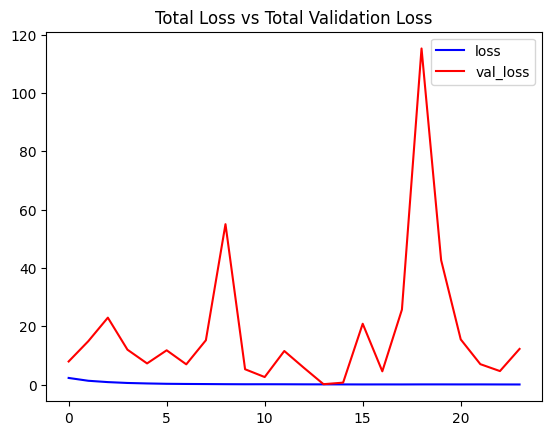

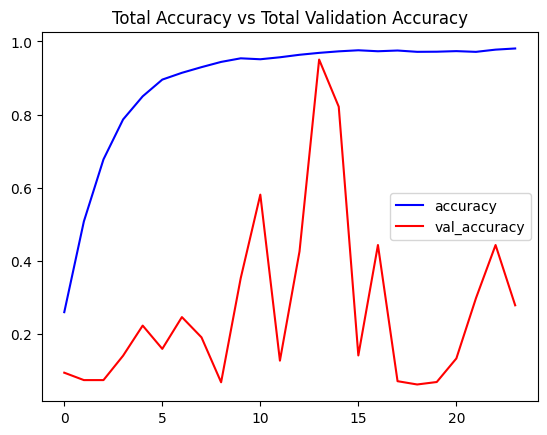

In [8]:

image_height = 64
image_width = 64
max_images_per_class = 1270
dataset_directory = "RGB"
classes_list=['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat']
    #classes_list = os.listdir(dataset_directory)
model_output_size = len(classes_list)
    
features, labels = create_dataset(image_height,image_width,max_images_per_class,classes_list,dataset_directory)
    
    # Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)
    
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.3, shuffle = True, random_state = seed_constant)
    
model = create_model(image_height,image_width,model_output_size)
 
print("Model Created Successfully!")
    
tf.keras.utils.plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)
        
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
 
# Adding loss, optimizer and metrics values to the model.)
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.005), metrics = ["accuracy"])
 
# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 128 , shuffle = True, validation_split = 0.1, callbacks = [early_stopping_callback])
    
model_evaluation_history = model.evaluate(features_test, labels_test)
    
    #labels_pred = model.pred(features_test)
labels_pred = (model.predict(features_test) > 0.5).astype("int32")
print(classification_report(labels_test, labels_pred))
    
    
    # Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___{current_date_time_string}___L_{model_evaluation_loss}___A_{model_evaluation_accuracy}.keras'
 
    # Saving your Model
model.save(model_name)
    
plot_metric(1,model_training_history,'loss', 'val_loss', 'Total Loss vs Total Validation Loss')
plot_metric(2,model_training_history,'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [1]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(np.asarray(labels_test).argmax(axis=1), np.asarray(labels_pred).argmax(axis=1))
cm_df = pd.DataFrame(cm, index = ['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat'], columns = ['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

plt.savefig("Coorelation Matrix.svg", format = "svg")
plt.show()


    #saving df to csv in case prof asks to better the visuals lol  
cm_df.to_csv(f'modelcm_A_{model_evaluation_accuracy}.csv')

NameError: name 'confusion_matrix' is not defined

In [7]:
image_height = 64
image_width = 64
max_images_per_class = 1270
dataset_directory = "RGB"
classes_list=['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat']
    #classes_list = os.listdir(dataset_directory)
model_output_size = len(classes_list)
    
features, labels = create_dataset(image_height,image_width,max_images_per_class,classes_list,dataset_directory)
    
    # Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)
    
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.3, shuffle = True, random_state = seed_constant)


Extracting Data of Class: clap
Extracting Data of Class: arm_cross
Extracting Data of Class: draw_x
Extracting Data of Class: draw_circle_CW
Extracting Data of Class: bowling
Extracting Data of Class: boxing
Extracting Data of Class: baseball_swing
Extracting Data of Class: tennis_swing
Extracting Data of Class: push
Extracting Data of Class: pickup_throw
Extracting Data of Class: jog
Extracting Data of Class: walk
Extracting Data of Class: sit2stand
Extracting Data of Class: lunge
Extracting Data of Class: squat


179/179 [==============================] - 52s 286ms/step


c:\users\annat\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       385
           1       1.00      0.85      0.92       410
           2       0.89      0.95      0.92       382
           3       0.94      0.94      0.94       375
           4       0.96      0.98      0.97       361
           5       0.99      0.98      0.99       372
           6       1.00      0.93      0.97       409
           7       1.00      0.84      0.91       353
           8       0.98      1.00      0.99       362
           9       1.00      0.90      0.95       386
          10       0.95      0.99      0.97       392
          11       0.97      0.98      0.97       326
          12       0.98      1.00      0.99       401
          13       0.99      1.00      0.99       420
          14       0.97      1.00      0.98       381

   micro avg       0.96      0.95      0.96      5715
   macro avg       0.97      0.95      0.96      5715
weighted avg       0.97   

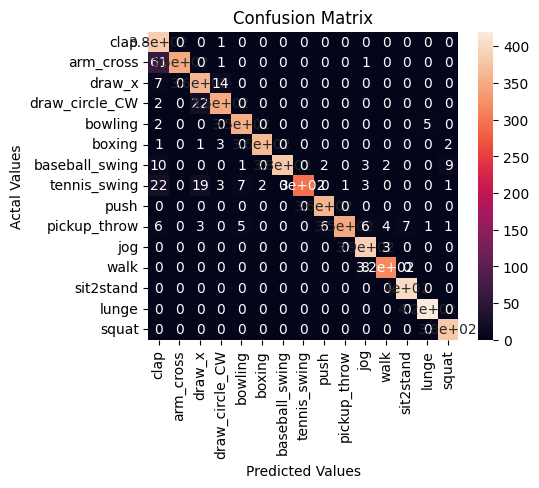

NameError: name 'model_evaluation_accuracy' is not defined

In [9]:
# load model with best accuracy and use predict
model2 = load_model('Model___2023_08_06__09_10_49___L_0.15266753733158112___A_0.9501312375068665.keras', compile = True)

labels_pred2 = (model2.predict(features_test) > 0.5).astype("int32")
print(classification_report(labels_test, labels_pred2))

cm = confusion_matrix(np.asarray(labels_test).argmax(axis=1), np.asarray(labels_pred2).argmax(axis=1))
cm_df = pd.DataFrame(cm, index = ['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat'], columns = ['clap','arm_cross','draw_x','draw_circle_CW','bowling','boxing','baseball_swing','tennis_swing','push','pickup_throw','jog','walk','sit2stand','lunge','squat'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

plt.savefig("Coorelation Matrix.svg", format = "svg")
plt.show()


    #saving df to csv in case prof asks to better the visuals lol  
cm_df.to_csv(f'modelcm_A_{model_evaluation_accuracy}.csv')